In [99]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from ipywidgets import interact
from ipywidgets import interact_manual

# 第一題：抽點系統

In [2]:
def choose():
    students = ["大雄","胖虎","小夫","宜靜","小杉"]
    student = np.random.choice(students)
    print(student)

In [3]:
interact_manual(choose)

interactive(children=(Button(description='Run Interact', style=ButtonStyle()), Output()), _dom_classes=('widge…

<function __main__.choose()>

# 第二題：變長變短

In [4]:
bar = "■"
def showBar(length):
    print(bar*length)

In [5]:
interact(showBar,length = (0,20))

interactive(children=(IntSlider(value=10, description='length', max=20), Output()), _dom_classes=('widget-inte…

<function __main__.showBar(length)>

# 第三題

In [50]:
def plot_circle(size):
    circle2 = plt.Circle((0.5, 0.5), size, color='blue')
    fig, ax = plt.subplots() # note we must use plt.subplots, not plt.subplot
    ax.add_artist(circle2)


In [52]:
interact(plot_circle,size=(0.1,0.5))

interactive(children=(FloatSlider(value=0.30000000000000004, description='size', max=0.5, min=0.1), Output()),…

<function __main__.plot_circle(size)>

# 挑戰題一：考試加權分數

In [18]:
weight = {
"土語系": [2, 2, 0, 1, 0, 0, 0, 1, 1, 0],
"財政系": [1, 1.5, 0, 1.5, 0, 0, 0, 0, 0, 0],
"金融系": [1, 1.5, 0, 2, 0, 0, 0, 0, 0, 0],
"國貿系": [1.5, 2, 0, 2, 0, 0, 0, 0, 0, 0],
"會計系": [1.5, 2, 0, 2, 0, 0, 0, 1, 1, 0],
"法律系": [1, 2, 0, 1, 0, 0, 0, 1, 0, 1],
"公行系": [1, 1.5, 0, 1.25, 0, 0, 0, 0, 0, 1.25],
"應數系": [1, 1, 1.5, 0, 1, 1, 0, 0, 0, 0],
"教育系": [1.5, 2, 0, 1.25, 0, 0, 0, 1, 1, 0]
} 

In [43]:
def cal_score(w_key):
    w = weight[w_key]
    score = [86.5, 79.4, 88.2, 96.5, 86.3, 76.8, 96.1, 78.5, 82.4, 88.6]
    print(round(np.dot(score,w)/sum(w),1))

In [44]:
key = list(weight.keys())
interact(cal_score,w_key=key)

interactive(children=(Dropdown(description='w_key', options=('土語系', '財政系', '金融系', '國貿系', '會計系', '法律系', '公行系', …

<function __main__.cal_score(w_key)>

In [1]:
from scipy.cluster.hierarchy import dendrogram, linkage

In [8]:
 X = [[i,i] for i in [2,8, 0, 4, 1, 9, 9, 0]]

In [9]:
Z = linkage(X, 'ward')

In [10]:
len(Z)

7

In [11]:
X

[[2, 2], [8, 8], [0, 0], [4, 4], [1, 1], [9, 9], [9, 9], [0, 0]]

In [12]:
Z

array([[ 5.        ,  6.        ,  0.        ,  2.        ],
       [ 2.        ,  7.        ,  0.        ,  2.        ],
       [ 0.        ,  4.        ,  1.41421356,  2.        ],
       [ 1.        ,  8.        ,  1.63299316,  3.        ],
       [ 9.        , 10.        ,  3.        ,  4.        ],
       [ 3.        , 12.        ,  5.81377674,  5.        ],
       [11.        , 13.        , 19.90058626,  8.        ]])

In [60]:
import pandas as pd
import numpy as np
import scipy.cluster.hierarchy as sch
from scipy import cluster

In [61]:
data = pd.read_csv('/Users/ben/Desktop/ProteomeClustering/ProteomeClustering/Example/colonCancerProtRatio.csv',index_col=0)

In [62]:
data = data.T

In [63]:
data

,A1BG,A2M,AAAS,AACS,AAGAB,AAK1,AAMDC,AAMP,AAR2,AARS,...,ZNF22,ZNF326,ZNF512,ZNF622,ZNF638,ZPR1,ZRANB2,ZW10,ZYX,ZZEF1
01CO005,-1.6720,-1.2520,0.3365,-0.0500,0.3610,-0.0427,-0.0518,0.3840,0.6140,0.1790,...,-0.0114,0.1960,0.2730,0.1140,0.3057,0.1721,0.3980,0.1540,0.1540,-0.9730
01CO006,-2.1500,-1.7270,0.0706,0.1244,0.8450,-0.1673,-1.3830,0.3650,0.2079,0.0790,...,-0.5570,0.2960,-0.3980,0.2244,0.5080,-0.5690,0.1669,0.1270,-1.4230,-0.1178
01CO008,-1.7860,-2.4700,0.3100,-0.1892,0.1767,-0.1294,-0.3730,-0.3740,-0.4232,-0.4920,...,-0.2480,0.7390,-0.8550,0.5620,0.2547,0.0560,0.7830,-0.4062,-0.8079,-0.2120
01CO013,-2.1150,-0.4820,0.4180,-0.5480,0.7690,-0.3700,0.0420,-0.6660,0.4820,-0.2309,...,-0.5230,0.3263,-0.7820,0.5810,0.3589,0.0994,-0.4470,0.4812,-0.0740,-0.5690
01CO014,-1.7930,-1.9980,0.4380,0.5060,0.6520,-0.2702,-1.5120,0.6470,-0.0429,0.2263,...,-0.7570,0.1970,-1.3450,0.1750,0.4711,0.3670,0.1330,0.3239,-1.4630,-0.4493
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21CO006,0.0380,-0.3850,-0.1531,-0.1420,0.0412,-0.2741,0.1750,0.0700,0.1622,0.2174,...,-0.2290,0.0624,-0.0914,0.3320,0.3616,-0.1290,-0.0100,0.3276,0.5363,-0.3352
21CO007,-1.9520,-1.8110,0.7850,-0.2600,0.5690,-0.4849,-2.5400,-0.1290,-0.1700,-0.0640,...,0.1560,0.6270,-0.0980,0.3926,0.8920,-0.2553,0.3670,-0.1830,-2.3720,-0.2994
22CO004,-1.3342,-1.9420,0.2892,0.3370,0.2552,-0.0550,-1.1050,-0.0014,0.0569,0.4850,...,-0.0529,0.3422,0.2070,0.2523,0.1690,0.3144,0.5510,0.2470,-0.8498,-0.3182
22CO006,-0.0690,0.2377,0.3630,0.5470,0.4430,-0.1480,-1.1740,0.1858,-0.6130,-0.1122,...,-0.4333,0.6390,-0.4540,-0.0540,-0.0035,0.4186,-0.0974,-0.1570,-1.1416,-0.4560


In [64]:
d = data.values

In [113]:
disMat = sch.distance.pdist(d,'cityblock') 

In [114]:
disMat

array([2460.121 , 2382.9098, 1864.7811, ..., 2146.4256, 2168.7943,
       2186.5961])

In [115]:
l = list(range(1,97))

In [116]:
Z=sch.linkage(disMat,method='ward')

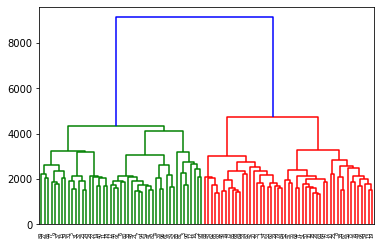

In [117]:
P=sch.dendrogram(Z,labels=l)

In [125]:
def HierarchicalClust_old(data,distance,linkage,k):
    from sklearn.cluster import AgglomerativeClustering
    clustering = AgglomerativeClustering(n_clusters=k, affinity=distance, linkage=linkage,
                                             compute_full_tree='auto', connectivity=None, distance_threshold=None,
                                             memory=None).fit(d)
    print(list(clustering.labels_))
    return list(clustering.labels_)

In [126]:
def HierarchicalClust(data,distance,linkage,k):

    disMat = sch.distance.pdist(data,distance)
    Z = sch.linkage(disMat,method=linkage) 
    clustered = cluster.hierarchy.cut_tree(Z,k)
    cluster_result = []
    for i in clustered:
        cluster_result.append(i[0])
    print(cluster_result)
    return cluster_result

In [127]:
a = HierarchicalClust_old(d,'euclidean','ward',5)

[2, 3, 3, 1, 1, 4, 4, 0, 1, 0, 1, 3, 0, 1, 1, 3, 4, 1, 0, 2, 4, 1, 1, 1, 0, 0, 1, 1, 2, 1, 1, 3, 4, 0, 0, 1, 1, 0, 1, 1, 0, 2, 2, 4, 2, 0, 0, 4, 0, 0, 0, 0, 2, 4, 0, 0, 2, 0, 0, 2, 4, 2, 0, 0, 2, 0, 0, 2, 2, 0, 0, 0, 2, 0, 0, 0, 1, 0, 2, 4, 3, 3, 3, 2, 2, 1, 0, 2, 1, 3, 4, 2, 3, 4, 0, 1]


In [128]:
b = HierarchicalClust(d,'euclidean','ward',5)

[0, 1, 1, 2, 2, 3, 3, 4, 2, 4, 2, 1, 4, 2, 2, 1, 3, 2, 4, 0, 3, 2, 2, 2, 4, 4, 2, 2, 0, 2, 2, 1, 3, 4, 4, 2, 2, 4, 2, 2, 4, 0, 0, 3, 0, 4, 4, 3, 4, 4, 4, 4, 0, 3, 4, 4, 0, 4, 4, 0, 3, 0, 4, 4, 0, 4, 4, 0, 0, 4, 4, 4, 0, 4, 4, 4, 2, 4, 0, 3, 1, 1, 1, 0, 0, 2, 4, 0, 2, 1, 3, 0, 1, 3, 4, 2]


In [130]:
maps = {0:4,1:2,2:0,3:1,4:3}
new_a = []
for i in a:
    new_a.append(maps[i])
print(new_a)

[0, 1, 1, 2, 2, 3, 3, 4, 2, 4, 2, 1, 4, 2, 2, 1, 3, 2, 4, 0, 3, 2, 2, 2, 4, 4, 2, 2, 0, 2, 2, 1, 3, 4, 4, 2, 2, 4, 2, 2, 4, 0, 0, 3, 0, 4, 4, 3, 4, 4, 4, 4, 0, 3, 4, 4, 0, 4, 4, 0, 3, 0, 4, 4, 0, 4, 4, 0, 0, 4, 4, 4, 0, 4, 4, 4, 2, 4, 0, 3, 1, 1, 1, 0, 0, 2, 4, 0, 2, 1, 3, 0, 1, 3, 4, 2]


In [131]:
new_a == b

True